In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,recall_score,precision_score,accuracy_score)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
from yellowbrick.features import FeatureImportances
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport

In [85]:
df = pd.read_csv('./datasets/demo.csv')

In [86]:
df['height_in_meters'] = df['Height'] * 0.0254

In [87]:
df['weight_in_kg'] = df['Weight'] / 2.2046

In [88]:
df['height_sqr'] = df['height_in_meters'] ** 2

In [89]:
df['bmi'] = df['weight_in_kg']/df['height_sqr']

In [90]:
df

,Gender,Height,Weight,height_in_meters,weight_in_kg,height_sqr,bmi
0,male,65.78331,112.9925,1.670896,51.253062,2.791894,18.357813
1,female,71.51521,136.4873,1.816486,61.910233,3.299623,18.762822
2,female,69.39874,153.0269,1.762728,69.412546,3.107210,22.339187
3,female,68.21660,142.3354,1.732702,64.562914,3.002255,21.504807
4,male,67.78781,144.2971,1.721810,65.452735,2.964631,22.077869
...,...,...,...,...,...,...,...
24995,female,69.50215,118.0312,1.765355,53.538601,3.116477,17.179207
24996,male,64.54826,120.1932,1.639526,54.519278,2.688045,20.282131
24997,female,64.69855,118.2655,1.643343,53.644879,2.700577,19.864230
24998,female,67.52918,132.2682,1.715241,59.996462,2.942052,20.392725


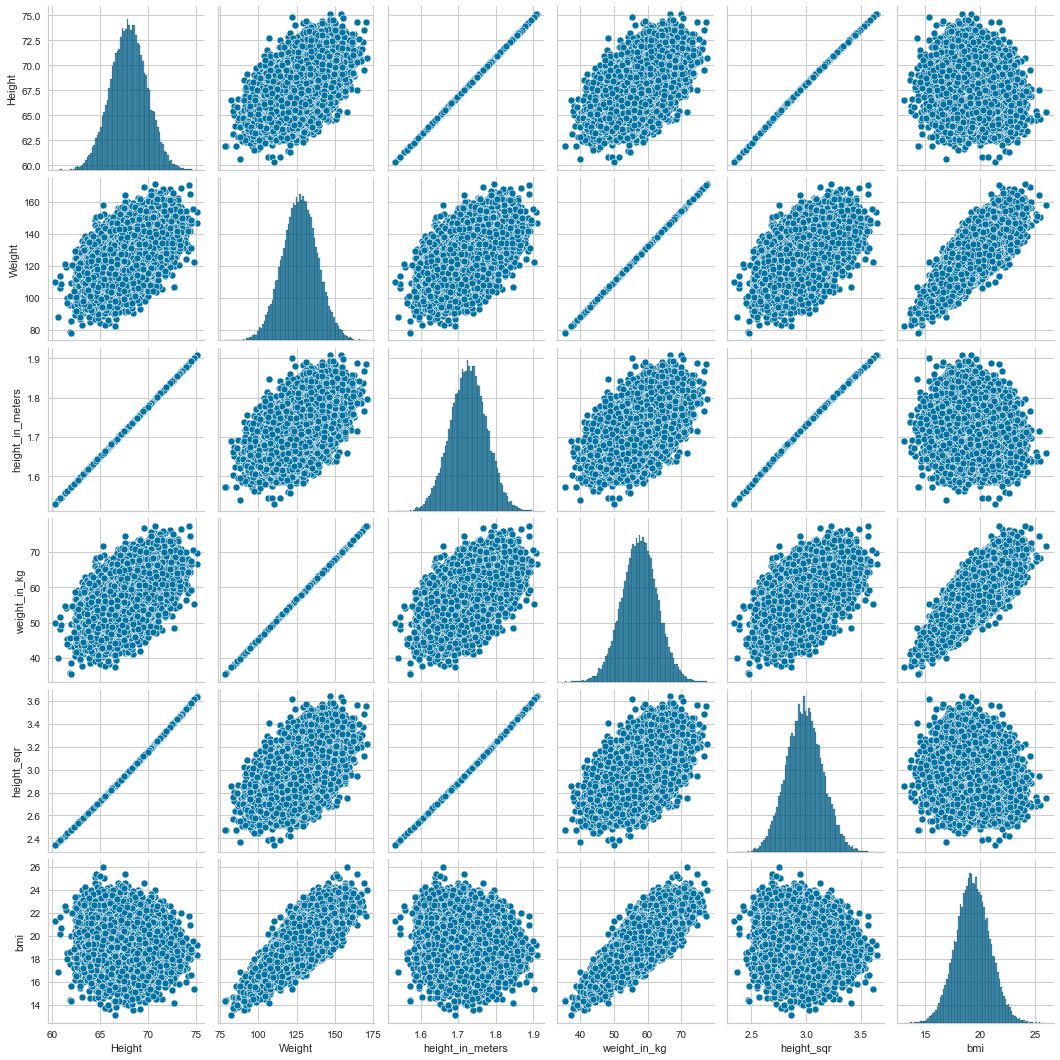

In [91]:
sns.pairplot(df)

In [92]:
conditions = [
    (df['bmi'] <= 20),
    (df['bmi'] > 20) & (df['bmi'] <= 25),
    (df['bmi'] > 25) & (df['bmi'] <= 30),
    (df['bmi'] > 30)
    ]
# create a list of the values we want to assign for each condition
values = ['underweight', 'normal', 'overweight', 'obese']

# create a new column and use np.select to assign values to it using our lists as arguments
df['bmi_class1'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Gender,Height,Weight,height_in_meters,weight_in_kg,height_sqr,bmi,bmi_class1
0,male,65.78331,112.9925,1.670896,51.253062,2.791894,18.357813,underweight
1,female,71.51521,136.4873,1.816486,61.910233,3.299623,18.762822,underweight
2,female,69.39874,153.0269,1.762728,69.412546,3.107210,22.339187,normal
3,female,68.21660,142.3354,1.732702,64.562914,3.002255,21.504807,normal
4,male,67.78781,144.2971,1.721810,65.452735,2.964631,22.077869,normal


<AxesSubplot:xlabel='weight_in_kg', ylabel='bmi'>

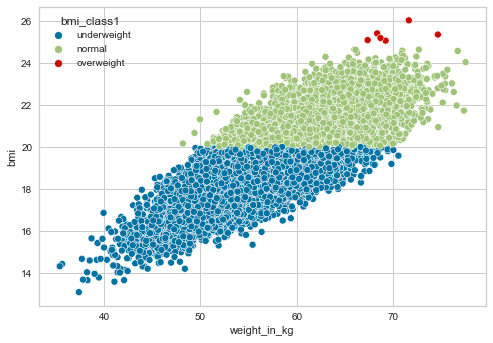

In [93]:
sns.scatterplot(data=df, x="weight_in_kg", y="bmi", hue="bmi_class1" )

In [94]:
df['bmiclass']= df.bmi_class1.map({'underweight':0,'normal':1,'overweight':2,'obese':3})

In [95]:
dum = pd.get_dummies(df.Gender)
dum

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
24995,1,0
24996,0,1
24997,1,0
24998,1,0


In [96]:
df1 = pd.concat([df,dum], axis=1)

In [97]:
df1

,Gender,Height,Weight,height_in_meters,weight_in_kg,height_sqr,bmi,bmi_class1,bmiclass,female,male
0,male,65.78331,112.9925,1.670896,51.253062,2.791894,18.357813,underweight,0,0,1
1,female,71.51521,136.4873,1.816486,61.910233,3.299623,18.762822,underweight,0,1,0
2,female,69.39874,153.0269,1.762728,69.412546,3.107210,22.339187,normal,1,1,0
3,female,68.21660,142.3354,1.732702,64.562914,3.002255,21.504807,normal,1,1,0
4,male,67.78781,144.2971,1.721810,65.452735,2.964631,22.077869,normal,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24995,female,69.50215,118.0312,1.765355,53.538601,3.116477,17.179207,underweight,0,1,0
24996,male,64.54826,120.1932,1.639526,54.519278,2.688045,20.282131,normal,1,0,1
24997,female,64.69855,118.2655,1.643343,53.644879,2.700577,19.864230,underweight,0,1,0
24998,female,67.52918,132.2682,1.715241,59.996462,2.942052,20.392725,normal,1,1,0


In [98]:
df1.drop(['Gender','Height','Weight','height_in_meters','bmi_class1','bmiclass'],axis='columns', inplace=True)

In [99]:
X = df1.drop('bmi', axis='columns')
X

,weight_in_kg,height_sqr,female,male
0,51.253062,2.791894,0,1
1,61.910233,3.299623,1,0
2,69.412546,3.107210,1,0
3,64.562914,3.002255,1,0
4,65.452735,2.964631,0,1
...,...,...,...,...
24995,53.538601,3.116477,1,0
24996,54.519278,2.688045,0,1
24997,53.644879,2.700577,1,0
24998,59.996462,2.942052,1,0


In [100]:
X.shape

(25000, 4)

In [101]:
y = df1.bmi
y

0        18.357813
1        18.762822
2        22.339187
3        21.504807
4        22.077869
           ...    
24995    17.179207
24996    20.282131
24997    19.864230
24998    20.392725
24999    18.506289
Name: bmi, Length: 25000, dtype: float64

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [103]:
clf = LinearRegression()

In [104]:
clf.fit(X_train,y_train)

LinearRegression()

In [105]:
print(clf.coef_)

[ 3.36120399e-01 -6.48898978e+00  3.64805557e-04 -3.64805557e-04]


In [106]:
y_pred = clf.predict(X_test)

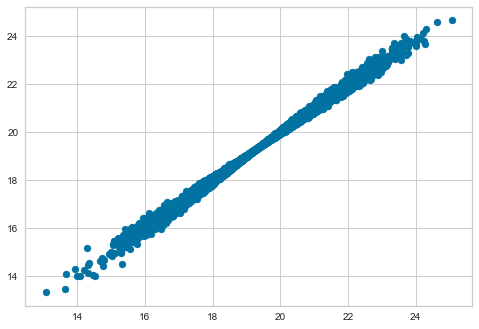

In [107]:
plt.scatter(y_test, y_pred)

(array([1.000e+00, 1.000e+00, 2.500e+01, 1.810e+02, 3.886e+03, 3.086e+03,
        2.800e+02, 3.400e+01, 5.000e+00, 1.000e+00]),
 array([-0.85349785, -0.68378689, -0.51407593, -0.34436497, -0.17465401,
        -0.00494306,  0.1647679 ,  0.33447886,  0.50418982,  0.67390078,
         0.84361174]),
 <BarContainer object of 10 artists>)

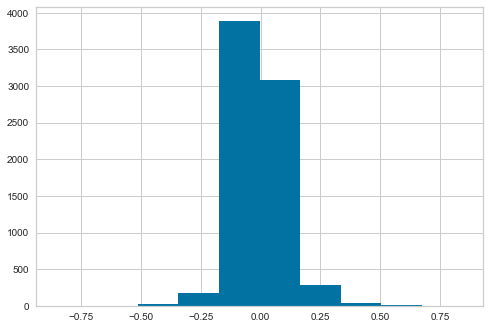

In [108]:
plt.hist(y_test - y_pred)

In [109]:
def predict_bmi(Gender, weight_in_kg, height_sqr) -> None : 
    loc_index = np.where(X.columns==Gender)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = weight_in_kg
    x[1] = height_sqr
    if loc_index >= 0:
        x[loc_index] = 1
        
    return clf.predict([x])

In [110]:
predict_bmi('male',90,2.5)

c:\python3.9\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.34425039])

In [111]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("_bmi.json","w") as f:
    f.write(json.dumps(columns))

In [114]:
import pickle
file = open("bmi_model.pickle", 'wb')
pickle.dump(clf, file)

In [113]:
X.columns

Index(['weight_in_kg', 'height_sqr', 'female', 'male'], dtype='object')